# Lab Segmentation 2

In [66]:
from commonfunctions import *
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Tinit:  137.0
Lower:  95.98688290007155
Higher:  210.61416589002795
Tnew:  153.30052439504976
Lower:  100.38554843181424
Higher:  225.21106980586535
Tnew:  162.7983091188398
Lower:  101.94354125426442
Higher:  230.2269806094183
Tnew:  166.08526093184136
Lower:  102.41132706374086
Higher:  231.6016057898903
Tnew:  167.00646642681556
Lower:  102.52805707372022
Higher:  231.92965109671553
Tnew:  167.22885408521788
Lower:  102.52805707372022
Higher:  231.92965109671553
Tnew:  167.22885408521788
167.22885408521788


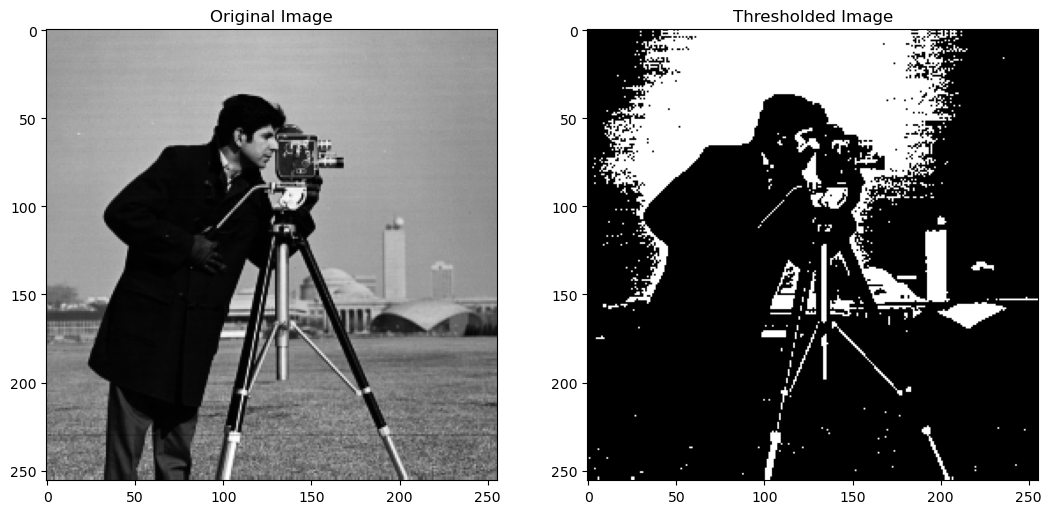

Image sample values:
[[0.9232949  0.93113804 0.93505961 ... 0.76155137 0.73299922 0.71339137]
 [0.91937333 0.9232949  0.92721647 ... 0.74194353 0.71731294 0.70162667]
 [0.91545176 0.91545176 0.91937333 ... 0.72625725 0.70048784 0.69378353]
 ...
 [0.34139961 0.34139961 0.33355647 ... 0.31424627 0.31816784 0.31424627]
 [0.30748941 0.30888824 0.31673137 ... 0.27503059 0.28287373 0.29463843]
 [0.29572471 0.30356784 0.31533255 ... 0.29463843 0.29463843 0.29463843]]
Tinit:  165.0
Lower:  96.06934949398453
Higher:  207.9053837299266
Tnew:  151.98736661195557
Lower:  84.90755267879129
Higher:  203.60467078862615
Tnew:  144.25611173370874
Lower:  82.49049019786966
Higher:  202.59438294417617
Tnew:  142.5424365710229
Lower:  82.03873057948604
Higher:  202.3872201995685
Tnew:  142.2129753895273
Lower:  82.03873057948604
Higher:  202.3872201995685
Tnew:  142.2129753895273
142.2129753895273


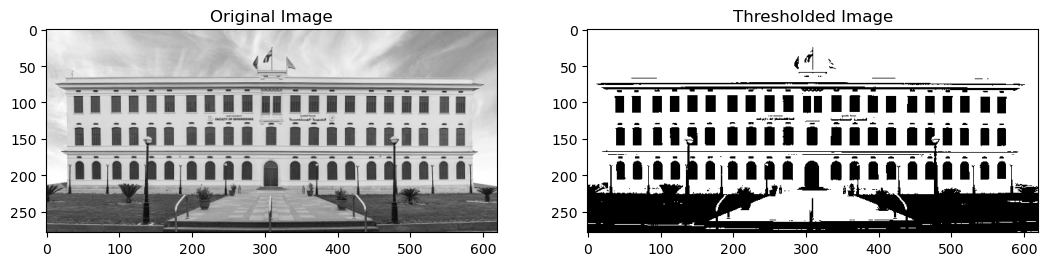

Tinit:  156.0
Lower:  134.32760622919753
Higher:  168.24913460961568
Tnew:  151.2883704194066
Lower:  127.84565471862375
Higher:  166.4466004380314
Tnew:  147.14612757832757
Lower:  123.8308950805771
Higher:  165.48841498296306
Tnew:  144.6596550317701
Lower:  121.4630215765123
Higher:  164.9312219258621
Tnew:  143.1971217511872
Lower:  120.72265904536997
Higher:  164.7546662309423
Tnew:  142.73866263815614
Lower:  119.99168663662691
Higher:  164.57904419024734
Tnew:  142.28536541343712
Lower:  119.99168663662691
Higher:  164.57904419024734
Tnew:  142.28536541343712
142.28536541343712


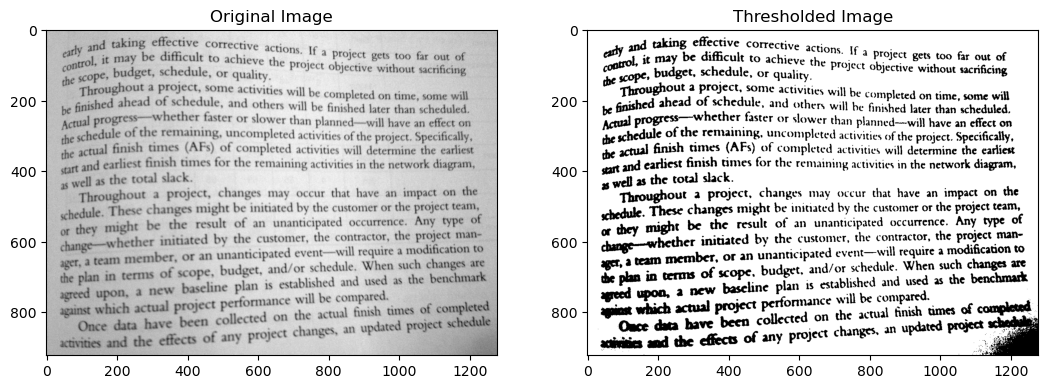

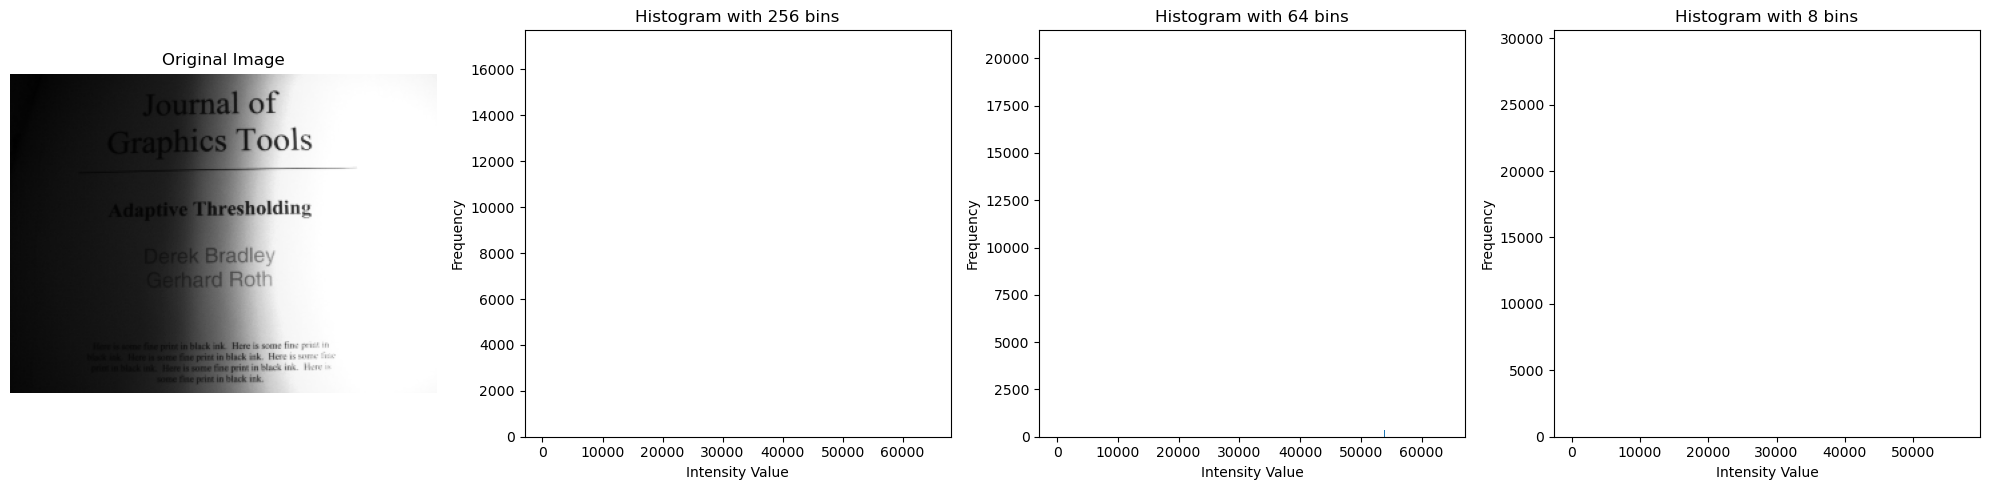

Tinit:  128.0
Lower:  18.378874273132727
Higher:  221.6332479334848
Tnew:  120.00606110330877
Lower:  16.329074217963107
Higher:  220.05481439204775
Tnew:  118.19194430500542
Lower:  15.939827252505994
Higher:  219.73674228954792
Tnew:  117.83828477102696
Lower:  15.717466199588895
Higher:  219.55197709363685
Tnew:  117.63472164661287
Lower:  15.717466199588895
Higher:  219.55197709363685
Tnew:  117.63472164661287
117.63472164661287


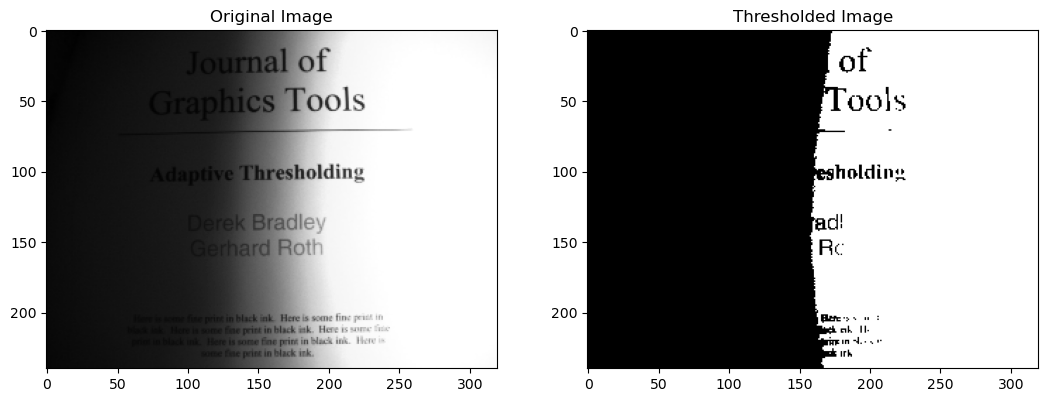

In [75]:
"""You are required to implement a function getThreshold: that takes an image and 
calculates the grey-level threshold according to the following algorithm.  
1-  Convert the image to Unit8. Hint: multiply the matrix by 255 and then use 
astype(‘uint8’). 
2-  Get counts array that contains the number of pixels in each grey-level.Hint:use your 
previously implemented function that calculated histogram. 
3-  Get initial threshold by getting the average mean of the pixels’ grey-level:  
a.  Tinit = 𝑟𝑜𝑢𝑛𝑑((∑𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑠Per𝑘=0𝑔𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑘 ∗ 
𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑃𝑖𝑥𝑒𝑙𝑠𝑘) / 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑖𝑥𝑒𝑙𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑖𝑚𝑎𝑔𝑒. )    
→ Hint: you can get total number of pixel by using the cumulative sum and 
find last element of it.   
→Hint to get the last element of a vector, use the index -1 like M[-1].  
4-  Get the two weighted averages (means), one for the lower pixels (have gray level 
less than Tinit) and the other for the higher pixels (have gray level more than Tinit).  
→Hint: use the same method you got the Tinit to calculate the mean, just change the 
gray levels range you are working on.  
Hint: example to get the range from 0:9 → L=list(range(0,10)) 
5-  Update the New threshold to be the average of the two means.  
6-  Repeat the same steps [4:5] until threshold saturates. 
"""
def getHist(img):
    counts = np.zeros(256)
    for pixel in img.flatten():
        counts[pixel] += 1
    return counts
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')
def display_image_and_histograms(image_path, nbins=256):
    # Read the image
    original_image = io.imread(image_path)
    
    # print(original_image.shape[2])
  
    # Convert to grayscale if the image is in RGB or RGBA format
    if len(original_image.shape) == 3:
        if original_image.shape[2] == 4:  # RGBA image
            original_image = original_image[:, :, :3]  # Discard the alpha channel
        image = rgb2gray(original_image)
    else:
        image = original_image  # Image is already in grayscale
    
    # figure
    fig, axes = plt.subplots(1,4, figsize=(20,5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    # ShowPixelsValues(image,"testtt")
    # histogram with diff bin sizes 
    for i,nbins in enumerate([256, 64, 8],start=1):
        hist,bins = np.histogram(image,nbins)
        axes[i].bar(bins[:-1] * 255,hist,width=0.8, align='center')
        axes[i].set_title(f"Histogram with {nbins} bins")
        axes[i].set_xlabel('Intensity Value')
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


def getThreshold(img):
    img = img*255
    img = img.astype('uint8')
    counts = getHist(img)
    
    Tinit = np.round(np.sum([i*counts[i] for i in range(len(counts))])/np.sum(counts))
    print("Tinit: ",Tinit)
    while True:
        lower = np.sum([i*counts[i] for i in range(int(Tinit))])/np.sum(counts[:int(Tinit)])
        
        higher = np.sum([i*counts[i] for i in range(int(Tinit),len(counts))])/np.sum(counts[int(Tinit):])
        print("Lower: ",lower)
        print("Higher: ",higher)
        
        Tnew = (lower+higher)/2
        print("Tnew: ",Tnew)
        if Tnew == Tinit:
            break
        Tinit = Tnew
    return Tinit
def print_image_sample(img, width_limit, height_limit):
    # Ensure the limits do not exceed the image dimensions
    width_limit = min(width_limit, img.shape[1])
    height_limit = min(height_limit, img.shape[0])
    
    # Extract the sub-region
    sample = img[:height_limit, :width_limit]
    
    # Print the sample values
    print("Image sample values:")
    print(sample)

#Conduct your experiments on “cameraman.png”, “cufe.png” ,”book1.png”and “book.png”. 
img = io.imread('cameraman.png')
threshold = getThreshold(img)
print(threshold)
show_images([img, img>threshold], ['Original Image', 'Thresholded Image'])

img1 = io.imread('cufe.png')
img1 = rgb2gray(img1)
print_image_sample(img1, 500, 500)
threshold = getThreshold(img1)
imageAfterThrehold = img1>threshold/255
print(threshold)
show_images([img1,imageAfterThrehold ], ['Original Image', 'Thresholded Image'])

img2 = io.imread('book1.png')
img2 = rgb2gray(img2)
threshold = getThreshold(img2)
print(threshold)
show_images([img2, img2>threshold/255], ['Original Image', 'Thresholded Image'])
display_image_and_histograms('book.png')

img3 = io.imread('book.png')
threshold = getThreshold(img3)
print(threshold)
show_images([img3, img3>threshold], ['Original Image', 'Thresholded Image'])


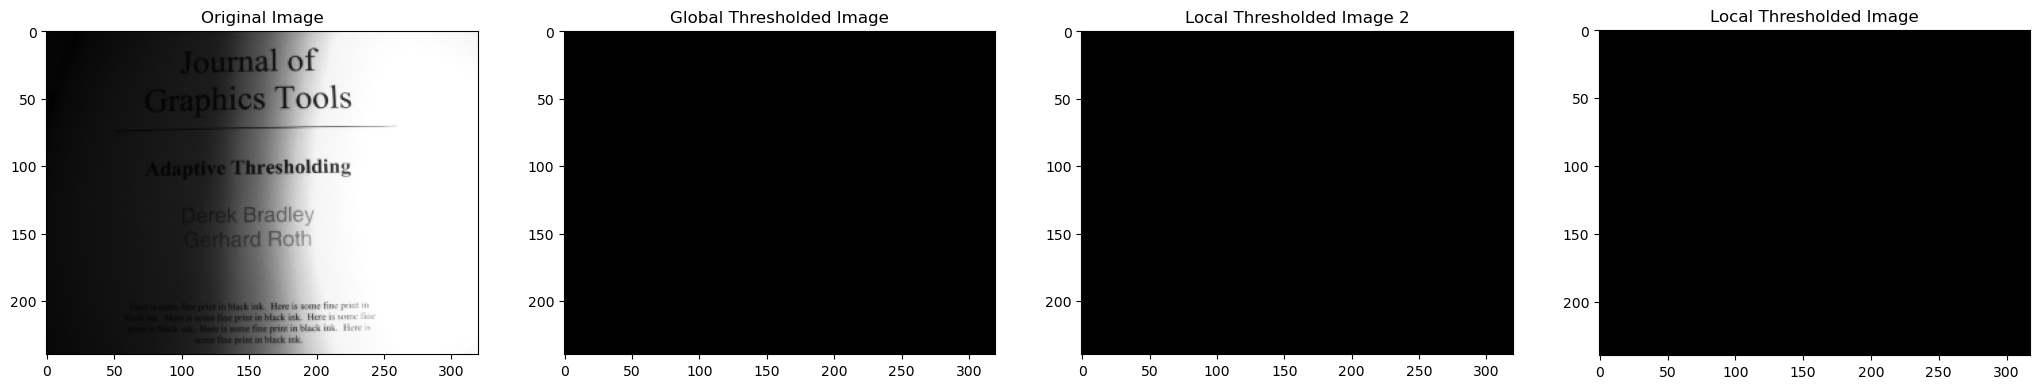

In [ ]:


import cv2


def apply_threshold(img, threshold):
    return img > threshold


def partition_image(img, num_partitions_height, num_partitions_width):
    h, w = img.shape
    h_step = h // num_partitions_height
    w_step = w // num_partitions_width
    quarters = []
    for i in range(num_partitions_height):
        for j in range(num_partitions_width):
            quarters.append(img[i*h_step:(i+1)*h_step, j*w_step:(j+1)*w_step])
    return quarters

def combine_quarters(quarters, num_partitions_height, num_partitions_width):
    rows = []
    for i in range(num_partitions_height):
        rows.append(np.hstack(quarters[i*num_partitions_width:(i+1)*num_partitions_width]))
    return np.vstack(rows)
def adaptive_local_threshold(image, window_size=11, C=2):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Pad image for border handling
    pad = window_size // 2
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    # Initialize output
    result = np.zeros_like(image)
    
    # Slide window across image
    for i in range(pad, padded.shape[0] - pad):
        for j in range(pad, padded.shape[1] - pad):
            # Extract window
            window = padded[i-pad:i+pad+1, j-pad:j+pad+1]
            
            # Calculate local mean and std
            local_mean = np.mean(window)
            local_std = np.std(window)
            
            # Calculate threshold
            threshold = local_mean * (1 + C * (local_std / 128 - 1))
            
            # Apply threshold
            if image[i-pad, j-pad] > threshold:
                result[i-pad, j-pad] = 255
                
    return result
# Load the image
img = io.imread('book.png')
img_gray = img

# Apply global threshold
global_threshold = adaptive_local_threshold(img_gray)
global_thresholded_img = apply_threshold(img_gray, global_threshold)

# Partition the image into four quarters
num_partitions_height = 3
num_partitions_width = 3
quarters = partition_image(img_gray, 3, 3)

# Apply local thresholds to each quarter
local_thresholded_quarters = [apply_threshold(q, adaptive_local_threshold(q)) for q in quarters]

# Combine the quarters back into one image
local_thresholded_img = combine_quarters(local_thresholded_quarters, 3, 3)

# Partition the image into four quarters
num_partitions_height = 2
num_partitions_width = 2
quarters2 = partition_image(img_gray, 2, 2)

# Apply local thresholds to each quarter
local_thresholded_quarters2 = [apply_threshold(q, adaptive_local_threshold(q)) for q in quarters2]

# Combine the quarters back into one image
local_thresholded_img2 = combine_quarters(local_thresholded_quarters2, 2, 2)



show_images([img_gray, global_thresholded_img,local_thresholded_img2, local_thresholded_img], ['Original Image', 'Global Thresholded Image', 'Local Thresholded Image 2', 'Local Thresholded Image'])